# Stratified_GridSearchCV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Wine

In [2]:
np.random.seed(1)
wine = datasets.load_wine()
# print description
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
# get the data
X = wine.data
y = wine.target

Podzielmy zbiór na część testową i treningową .

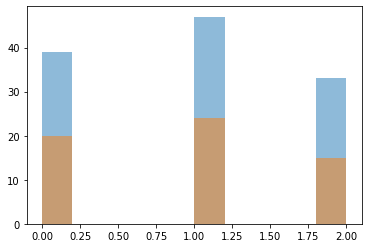

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej


In [6]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_1 = GridSearchCV(SVC(), param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'C': 1, 'gamma': 0.001}

In [8]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [9]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
# display(results.head())

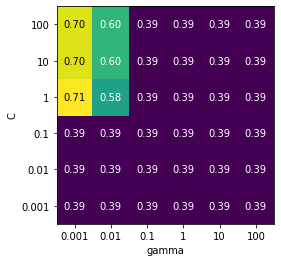

In [10]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

In [11]:
from sklearn import  metrics
models = []

def get_scores(name, model):
    precision_score = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    recall_score = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    f1_score = metrics.f1_score(y_test, model.predict(X_test), average='micro')
    accuracy_score = metrics.accuracy_score(y_test, model.predict(X_test))

    return dict(method=name, precision=precision_score, recall=recall_score, f1=f1_score, accuracy=accuracy_score)

def print_scores(scores):
    print(scores['method'])
    print("R^2: {}".format(scores['precision']))
    print("recall_score: {}".format(scores['recall']))
    print("f1_score: {}".format(scores['f1']))
    print("accuracy_score: {}".format(scores['accuracy']))

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html

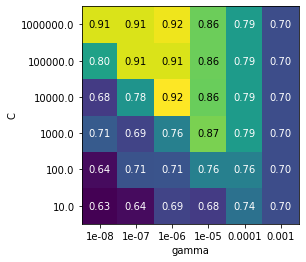

SVM rbf
R^2: 0.9491525423728814
recall_score: 0.9491525423728814
f1_score: 0.9491525423728814
accuracy_score: 0.9491525423728814


In [13]:
param_grid = {'C': [1e1, 1e2, 1e3, 1e4, 1e5, 1e6],
              'gamma': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]}

grid_1 = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=kfold, return_train_score=True, n_jobs=4)

grid_1.fit(X_train, y_train)
grid_1.best_params_

results = pd.DataFrame(grid_1.cv_results_)

scores = np.array(results.mean_test_score).reshape(6, 6)

heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

models.append(('SVM rbf', grid_1.best_estimator_))
scores_1 = get_scores(*models[-1])
print_scores(scores_1)

In [14]:
df = pd.DataFrame(data=scores_1, index=[0])
df

,method,precision,recall,f1,accuracy
0,SVM rbf,0.949153,0.949153,0.949153,0.949153


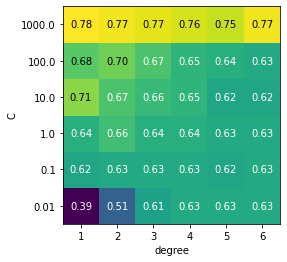

SVM poly
R^2: 0.9152542372881356
recall_score: 0.9152542372881356
f1_score: 0.9152542372881356
accuracy_score: 0.9152542372881356


,method,precision,recall,f1,accuracy
0,SVM rbf,0.949153,0.949153,0.949153,0.949153
1,SVM poly,0.915254,0.915254,0.915254,0.915254


In [15]:
param_grid = {'C': [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
              'degree': [1, 2, 3, 4, 5, 6]}

grid_2 = GridSearchCV(SVC(kernel='poly'), param_grid, cv=kfold, return_train_score=True, n_jobs=4)

grid_2.fit(X_train, y_train)
grid_2.best_params_

results = pd.DataFrame(grid_2.cv_results_)

scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
heatmap(scores, xlabel='degree', xticklabels=param_grid['degree'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

models.append(('SVM poly', grid_2.best_estimator_))
scores_2 = get_scores(*models[-1])
print_scores(scores_2)

df.loc[1] = scores_2
df

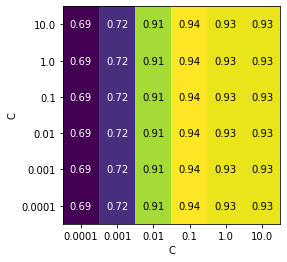

SVM linear
R^2: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


,method,precision,recall,f1,accuracy
0,SVM rbf,0.949153,0.949153,0.949153,0.949153
1,SVM poly,0.915254,0.915254,0.915254,0.915254
2,SVM linear,1.000000,1.000000,1.000000,1.000000


In [16]:
param_grid = {'C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]}

grid_3 = GridSearchCV(SVC(kernel='linear'), param_grid, cv=kfold, return_train_score=True, n_jobs=4)

grid_3.fit(X_train, y_train)
grid_3.best_params_

results = pd.DataFrame(grid_3.cv_results_)

scores = np.array([results.mean_test_score] * 6).reshape(6, 6)
# plot the mean cross-validation scores
heatmap(scores, xlabel='C', xticklabels=param_grid['C'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

models.append(('SVM linear', grid_3.best_estimator_))
scores_3 = get_scores(*models[-1])
print_scores(scores_3)

df.loc[2] = scores_3
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


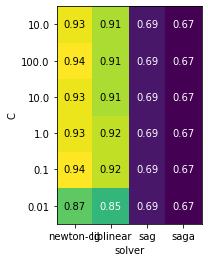

Logistic Regression
R^2: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


,method,precision,recall,f1,accuracy
0,SVM rbf,0.949153,0.949153,0.949153,0.949153
1,SVM poly,0.915254,0.915254,0.915254,0.915254
2,SVM linear,1.000000,1.000000,1.000000,1.000000
3,Logistic Regression,1.000000,1.000000,1.000000,1.000000


In [17]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e1],
              'solver': ['newton-cg', 'liblinear', 'sag', 'saga']}

grid_4 = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True, n_jobs=4)

grid_4.fit(X_train, y_train)
grid_4.best_params_

results = pd.DataFrame(grid_4.cv_results_)

scores = np.array(results.mean_test_score).reshape(6, 4)
# plot the mean cross-validation scores
heatmap(scores, xlabel='solver', xticklabels=param_grid['solver'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

models.append(('Logistic Regression', grid_4.best_estimator_))
scores_4 = get_scores(*models[-1])
print_scores(scores_4)

df.loc[3] = scores_4
df